# Evaluate the cell fate perturbation significance on perturb-seq

We used permutation test to evaluate the significance via shuffling the MELD likelihood

## Library imports

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import cellrank as cr
import scanpy as sc
import scvelo as scv

from rgv_tools import DATA_DIR

/home/icb/weixu.wang/miniconda3/envs/regvelo-py310/lib/python3.10/site-packages/anndata/utils.py:434: FutureWarning: Importing read_csv from `anndata` is deprecated. Import anndata.io.read_csv instead.
  warnings.warn(msg, FutureWarning)
/home/icb/weixu.wang/miniconda3/envs/regvelo-py310/lib/python3.10/site-packages/anndata/utils.py:434: FutureWarning: Importing read_excel from `anndata` is deprecated. Import anndata.io.read_excel instead.
  warnings.warn(msg, FutureWarning)
/home/icb/weixu.wang/miniconda3/envs/regvelo-py310/lib/python3.10/site-packages/anndata/utils.py:434: FutureWarning: Importing read_hdf from `anndata` is deprecated. Import anndata.io.read_hdf instead.
  warnings.warn(msg, FutureWarning)
/home/icb/weixu.wang/miniconda3/envs/regvelo-py310/lib/python3.10/site-packages/anndata/utils.py:434: FutureWarning: Importing read_loom from `anndata` is deprecated. Import anndata.io.read_loom instead.
  warnings.warn(msg, FutureWarning)
/home/icb/weixu.wang/miniconda3/envs/regve

## General setting

In [2]:
plt.rcParams["svg.fonttype"] = "none"
sns.reset_defaults()
sns.reset_orig()
scv.settings.set_figure_params("scvelo", dpi_save=400, dpi=80, transparent=True, fontsize=14, color_map="viridis")

## Constants

In [3]:
DATASET = "zebrafish"

In [4]:
SAVE_DATA = True
if SAVE_DATA:
    (DATA_DIR / DATASET / "results").mkdir(parents=True, exist_ok=True)

In [5]:
groups = [
    "fli1a_erf_erfl3",
    "control",
    "erf_erfl3",
    "mitfa",
    "rarga",
    "nr2f5",
    "tfec",
    "rxraa",
    "fli1a_elk3",
    "tfec_mitfa_bhlhe40",
    "elk3",
    "mitfa_tfec",
    "mitfa_tfec_tfeb",
    "fli1a",
    "ebf3a",
    "elf1",
    "nr2f2",
    "ets1",
]

## Data loading

In [6]:
adata = sc.read_h5ad(DATA_DIR / DATASET / "processed" / "perturbseq_all.h5ad")

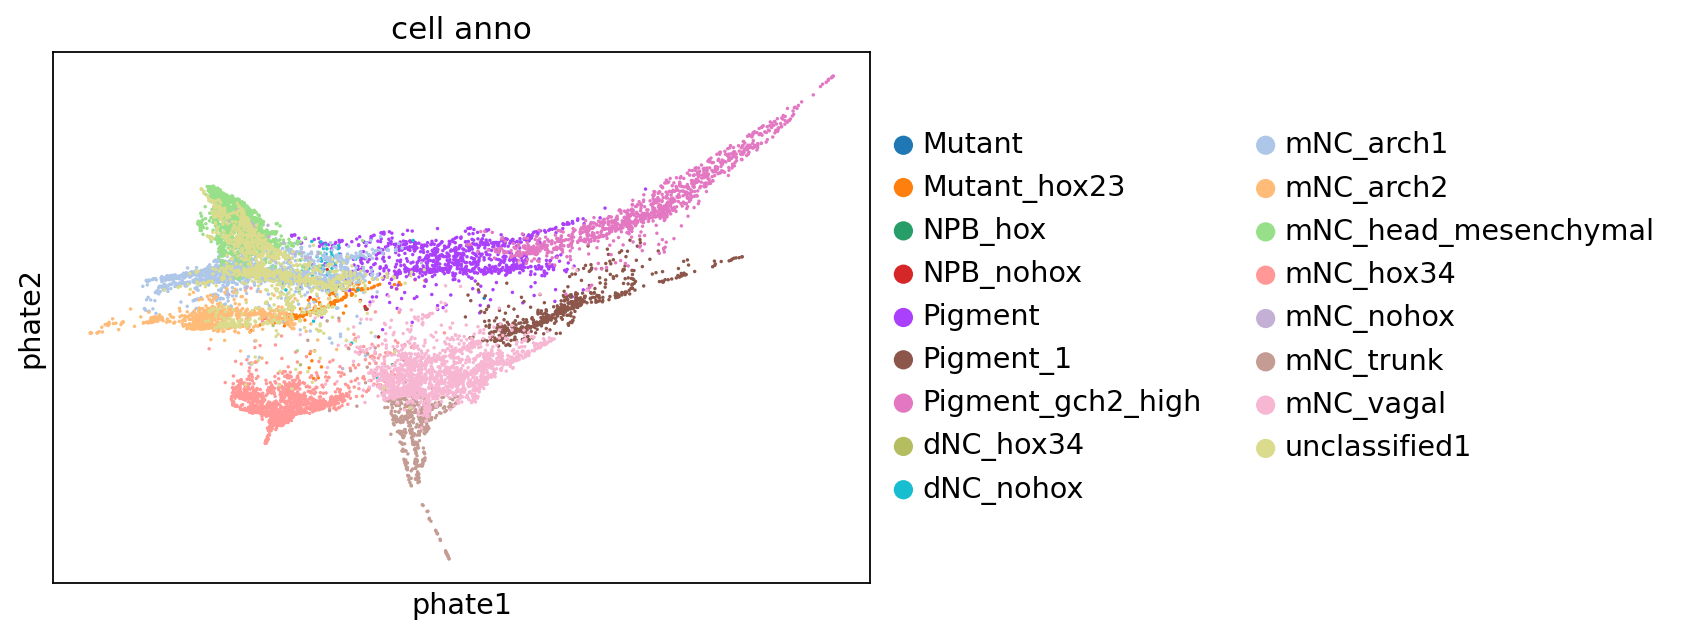

In [7]:
sc.pl.scatter(adata, basis="phate", color="cell_anno")

In [8]:
adata = adata[adata.obs["sgRNA_group"].isin(groups)].copy()

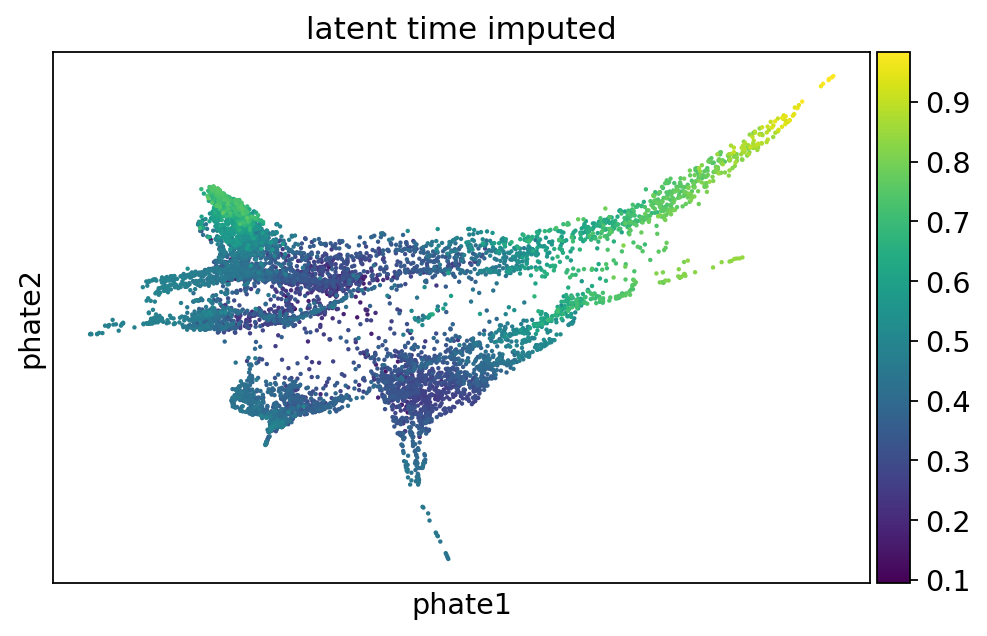

In [9]:
sc.pl.scatter(adata, basis="phate", color="latent_time_imputed")

In [10]:
sc.pp.neighbors(adata, n_pcs=30, n_neighbors=30)

n_states = 7
pk = cr.kernels.PseudotimeKernel(adata, time_key="latent_time_imputed")
pk.compute_transition_matrix()

## evaluate the fate prob on original space
estimator = cr.estimators.GPCCA(pk)
estimator.compute_macrostates(n_states=n_states, cluster_key="cell_anno", n_cells=100)

  0%|          | 0/7676 [00:00<?, ?cell/s]

GPCCA[kernel=PseudotimeKernel[n=7676], initial_states=None, terminal_states=None]

/home/icb/weixu.wang/miniconda3/envs/regvelo-py310/lib/python3.10/site-packages/scvelo/plotting/scatter.py:656: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  smp = ax.scatter(
/home/icb/weixu.wang/miniconda3/envs/regvelo-py310/lib/python3.10/site-packages/scvelo/plotting/scatter.py:694: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(
/home/icb/weixu.wang/miniconda3/envs/regvelo-py310/lib/python3.10/site-packages/scvelo/plotting/utils.py:1396: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(x, y, s=bg_size, marker=".", c=bg_color, zorder=zord - 2, **kwargs)
/home/icb/weixu.wang/miniconda3/envs/regvelo-py310/lib/python3.10/site-packages/scvelo/plotting/utils.py:1397: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(x, y, s=gp_size, marker=".", c=gp_color, zorder=zord - 1, **kwargs

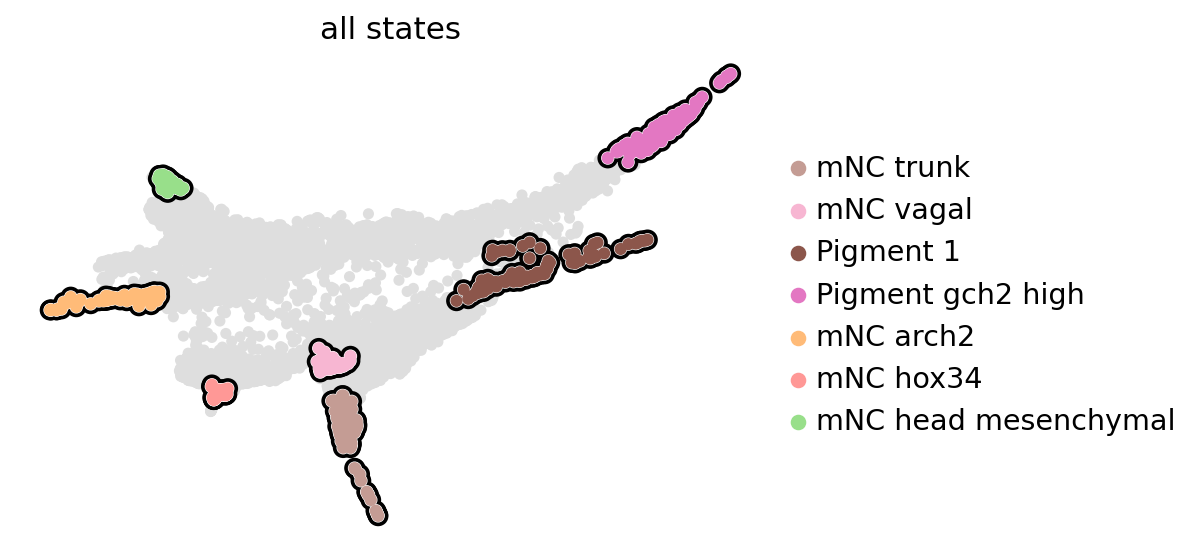

In [11]:
estimator.plot_macrostates(which="all", discrete=True, legend_loc="right", s=100, basis="phate")

/home/icb/weixu.wang/miniconda3/envs/regvelo-py310/lib/python3.10/site-packages/scvelo/plotting/scatter.py:656: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  smp = ax.scatter(
/home/icb/weixu.wang/miniconda3/envs/regvelo-py310/lib/python3.10/site-packages/scvelo/plotting/scatter.py:694: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(
/home/icb/weixu.wang/miniconda3/envs/regvelo-py310/lib/python3.10/site-packages/scvelo/plotting/utils.py:1396: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(x, y, s=bg_size, marker=".", c=bg_color, zorder=zord - 2, **kwargs)
/home/icb/weixu.wang/miniconda3/envs/regvelo-py310/lib/python3.10/site-packages/scvelo/plotting/utils.py:1397: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(x, y, s=gp_size, marker=".", c=gp_color, zorder=zord - 1, **kwargs

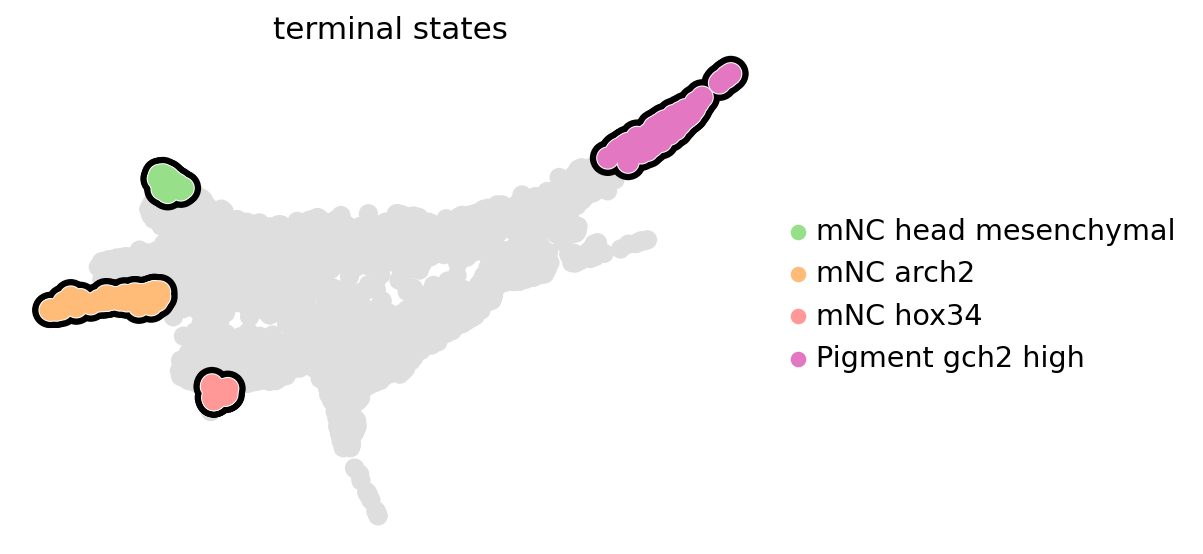

In [73]:
estimator.set_terminal_states(
    states=["mNC_head_mesenchymal", "mNC_arch2", "mNC_hox34", "Pigment_gch2_high"], n_cells=100
)
estimator.plot_macrostates(which="terminal", legend_loc="right", size=300, basis="phate")

In [74]:
cell_states = [
    "mNC_head_mesenchymal",
    "mNC_arch1",
    "mNC_arch2",
    "mNC_hox34",
    "mNC_vagal",
    "mNC_trunk",
    "Pigment",
    "Pigment_1",
    "Pigment_gch2_high",
    "unclassified1",
    "dNC_nohox",
    "Mutant",
    "Mutant_hox23",
]

In [79]:
score_m = []
for g in np.array(groups)[[i not in ["control"] for i in groups]]:
    filename = DATA_DIR / DATASET / "raw" / f"MELD_likelihood_raw/likelihood_{g}.csv"
    likelihood = pd.read_csv(filename, index_col=0)

    sobject = adata[(adata.obs["sgRNA_group"] == g) | (adata.obs["sgRNA_group"] == "control")].copy()

    # Assign likelihood values to the subset, aligned by column (cell) names
    # sobject.obs['likelihood'] = likelihood.loc[sobject.obs.index,"likelihood"]
    sobject.obs["likelihood"] = likelihood.loc[sobject.obs.index, [f"{g}A"]]

    score = []
    for i in ["mNC_arch2", "mNC_head_mesenchymal", "mNC_hox34", "Pigment_gch2_high"]:
        # Filter by cell state
        obj = sobject[sobject.obs["term_states_fwd"] == i]

        # Get likelihoods for cells with latent_time_imputed >= median
        lks = obj.obs.loc[:, "likelihood"]

        # Append median likelihood to score vector
        score.append(np.median(lks))

    # Append scores to result matrix
    score_m.append(score)

In [83]:
score_m = pd.DataFrame(
    score_m,
    columns=["mNC_arch2", "mNC_head_mesenchymal", "mNC_hox34", "Pigment_gch2_high"],
    index=np.array(groups)[[i not in ["control"] for i in groups]],
)

In [89]:
MELD_score = score_m.copy()

## Calculate P-value

In [90]:
score_m_all = []
for nrun in range(1000):
    score_m = []
    for g in np.array(groups)[[i not in ["control"] for i in groups]]:
        filename = DATA_DIR / DATASET / "raw" / f"MELD_likelihood_raw/likelihood_{g}.csv"
        likelihood = pd.read_csv(filename, index_col=0)

        sobject = adata[(adata.obs["sgRNA_group"] == g) | (adata.obs["sgRNA_group"] == "control")].copy()

        # Assign likelihood values to the subset, aligned by column (cell) names
        sobject.obs["likelihood"] = likelihood.loc[sobject.obs.index, [f"{g}A"]]
        sobject.obs["term_states_fwd"] = np.random.permutation(sobject.obs["term_states_fwd"].tolist()).tolist()

        score = []
        for i in ["mNC_arch2", "mNC_head_mesenchymal", "mNC_hox34", "Pigment_gch2_high"]:
            # Filter by cell state
            obj = sobject[sobject.obs["term_states_fwd"] == i]

            # Get likelihoods for cells with latent_time_imputed >= median
            lks = obj.obs.loc[:, "likelihood"]

            # Append median likelihood to score vector
            score.append(np.median(lks))

        # Append scores to result matrix
        score_m.append(score)

    score_m_all.append(np.array(score_m))

In [91]:
score_perm_array = np.array(score_m_all)  # shape: (1000, len(groups), 4)

# Empirical p-value: count how many times permuted scores are more extreme than observed
# Two-tailed p-value
abs_real = np.abs(MELD_score.values)
abs_perm = np.abs(score_perm_array)

# Count how many permuted scores are >= observed scores (broadcasting)
counts = np.sum(abs_perm >= abs_real[None, :, :], axis=0)

# Empirical p-value: (count + 1) / (n_permutations + 1) to avoid zero p-values
empirical_p = (counts) / (score_perm_array.shape[0])

# Convert to DataFrame with same structure
empirical_p_df = pd.DataFrame(empirical_p, index=MELD_score.index, columns=MELD_score.columns)

## Save data

In [88]:
if SAVE_DATA:
    MELD_score.to_csv(DATA_DIR / DATASET / "results" / "MELD_median_score.csv")
    empirical_p_df.to_csv(DATA_DIR / DATASET / "results" / "pval_mat.csv")